In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
PARTY_ORDER = [
    'vvd',
    'd66',
    'glpvda',
    'pvv',
    'cda',
    'sp',
    'fvd',
    'pvdd',
    'cu',
    'volt',
    'ja21',
    'sgp',
    'denk',
    '50plus',
    'bbb',
    'bij1',
    'pp',
    'bnvl',
    'nsc',
    'splinter',
    'lp',
    'lef',
    'svn',
]

PARTY_SEAT = [
    'vvd',
    'nsc',
    'glpvda',
    'pvv',
    'bbb',
    'd66',
    'pvdd',
    'sp',
    'volt',
    'cu',
    'cda',
    'fvd',
    'sgp',
    'denk',
    'ja21',
    'bij1',
    '50plus',
]


## Logos

In [49]:
import requests

from PIL import Image
import io
import math

STEMWIJZER_PARTIES_URL = 'https://tweedekamer2023.stemwijzer.nl/gfx/img/parties.png'
NUM_PARTIES = 26

response = requests.get(STEMWIJZER_PARTIES_URL)
image_bytes = response.content
image = Image.open(io.BytesIO(image_bytes))

part_height = math.floor(image.height / NUM_PARTIES)

for i, party in enumerate(PARTY_ORDER):
    bottom = i * part_height
    top = (i + 1) * part_height
    part = image.crop((0, bottom, image.width, top))
    part.save(f'logos/{party}.png')

In [11]:
def plot_logo(x, y, image, ax, zoom=1):
    '''Help function for plotting logos on ax'''
    image = plt.imread(image)
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

# Stemwijzer
Data van de stemwijzer voor de Tweede Kamer verkiezingen.

Codering:
- `1`: `Eens`
- `0`: `Neutraal`
- `-1`: `Oneens`

In [12]:
stemwijzer = pd.read_csv('data/stemwijzer.csv', index_col=0)

stemwijzer_totaal = stemwijzer.transpose()
partijen_totaal = stemwijzer_totaal.index
len(stemwijzer_totaal)

23

In [13]:
(stemwijzer==1).sum().sort_values(ascending=False).to_frame('Ja').to_clipboard()

In [14]:
# Zittende partijen
stemwijzer_zetel = stemwijzer[PARTY_SEAT].transpose()
partijen_zetel = stemwijzer_zetel.index
len(stemwijzer_zetel)

17

In [15]:
# Niet-zittende partijen
stemwijzer_nieuw = stemwijzer.drop(PARTY_SEAT, axis=1).transpose()
partijen_nieuw = stemwijzer_nieuw.index
len(stemwijzer_nieuw)

6

## Principal Component Analysis

In [33]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(stemwijzer_totaal)
print(pca.explained_variance_ratio_)

[0.31510335 0.14793005]


In [59]:
pc_1 = principal_components[:, 0]
pc_2 = principal_components[:, 1]

In [35]:
pc_features = pd.DataFrame(pca.components_, columns=stemwijzer_zetel.columns, index=['pc1', 'pc2']).transpose()

features_ordered = pd.DataFrame()
for pc in pc_features.columns:
    features_ordered[pc] = pc_features[pc].sort_values(ascending=False).index
features_ordered

,pc1,pc2
0,gezinshereniging,cultuuronderwijs
1,lagere-prijs-benzine,vliegbelasting
2,kerncentrales,vuurwerk
3,ontwikkelingshulp-en-asielszoekers,kerncentrales
4,minimumstraffen,co2-opslag
5,kiezen-per-regio,stikstof
6,kopen-huurwoning,bouwen-op-landbouwgrond
7,uitbreiding-europese-unie,vee
8,cultuuronderwijs,kinderopvang-zonder-winstoogmerk
9,elektrische-autos,kiezen-per-regio


## Political Spectrum (1D)

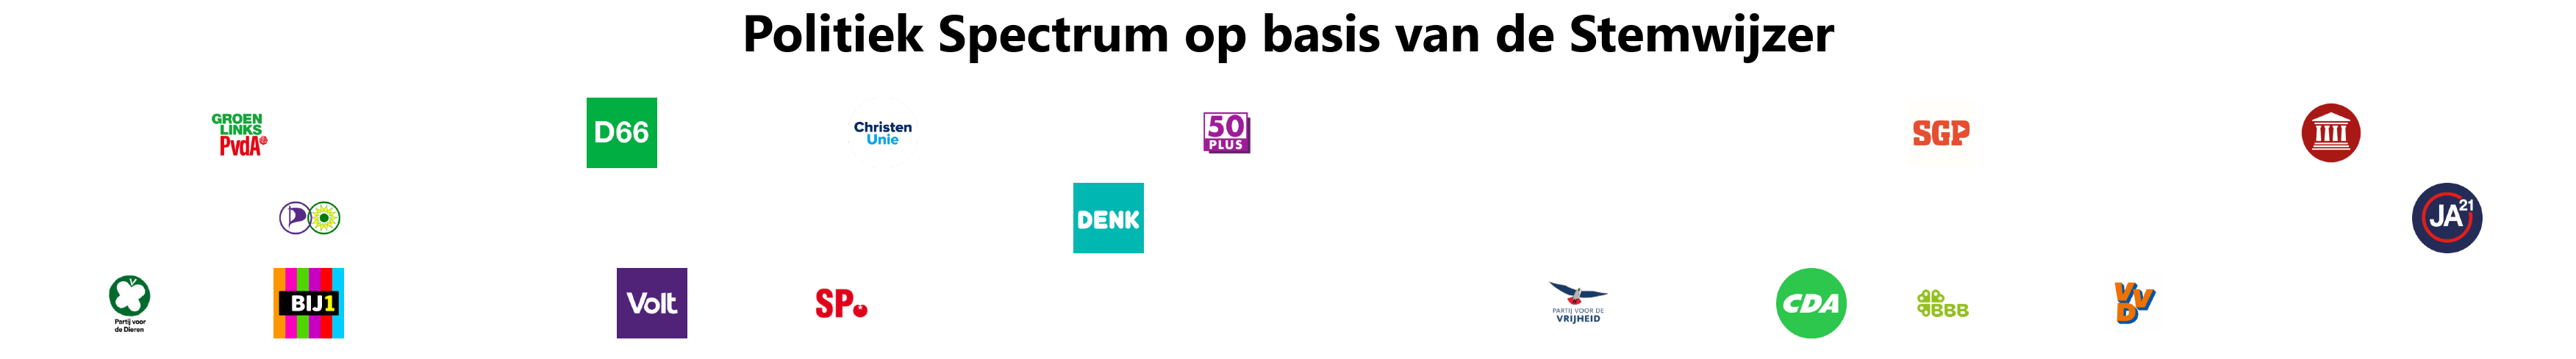

In [53]:
fig, ax = plt.subplots(figsize=(20,2), dpi=180, facecolor='white')

# Layout
fig.tight_layout()
ax.set_axis_off()

# Plot title
ax.set_title('Politiek Spectrum op basis van de Stemwijzer', pad=40,
             fontsize=28, fontweight='bold', fontname='segoe ui')

# Plot logos
y_pos = [-0.25, 0.25, 0.25, -0.25, -0.25, -0.25, 0.25, -0.25, 0.25, -0.25, 0, 0.25, 0, 0.25, -0.25, -0.25, 0]  # y nudges
for x, y, party in zip(pc_1, y_pos, partijen_totaal):
    plot_logo(x, y, f"logos/{party}.png", ax=ax, zoom=.3)

fig.savefig('figures/political_spectrum.png', dpi=300, bbox_inches='tight')

## Political Compass (2D)

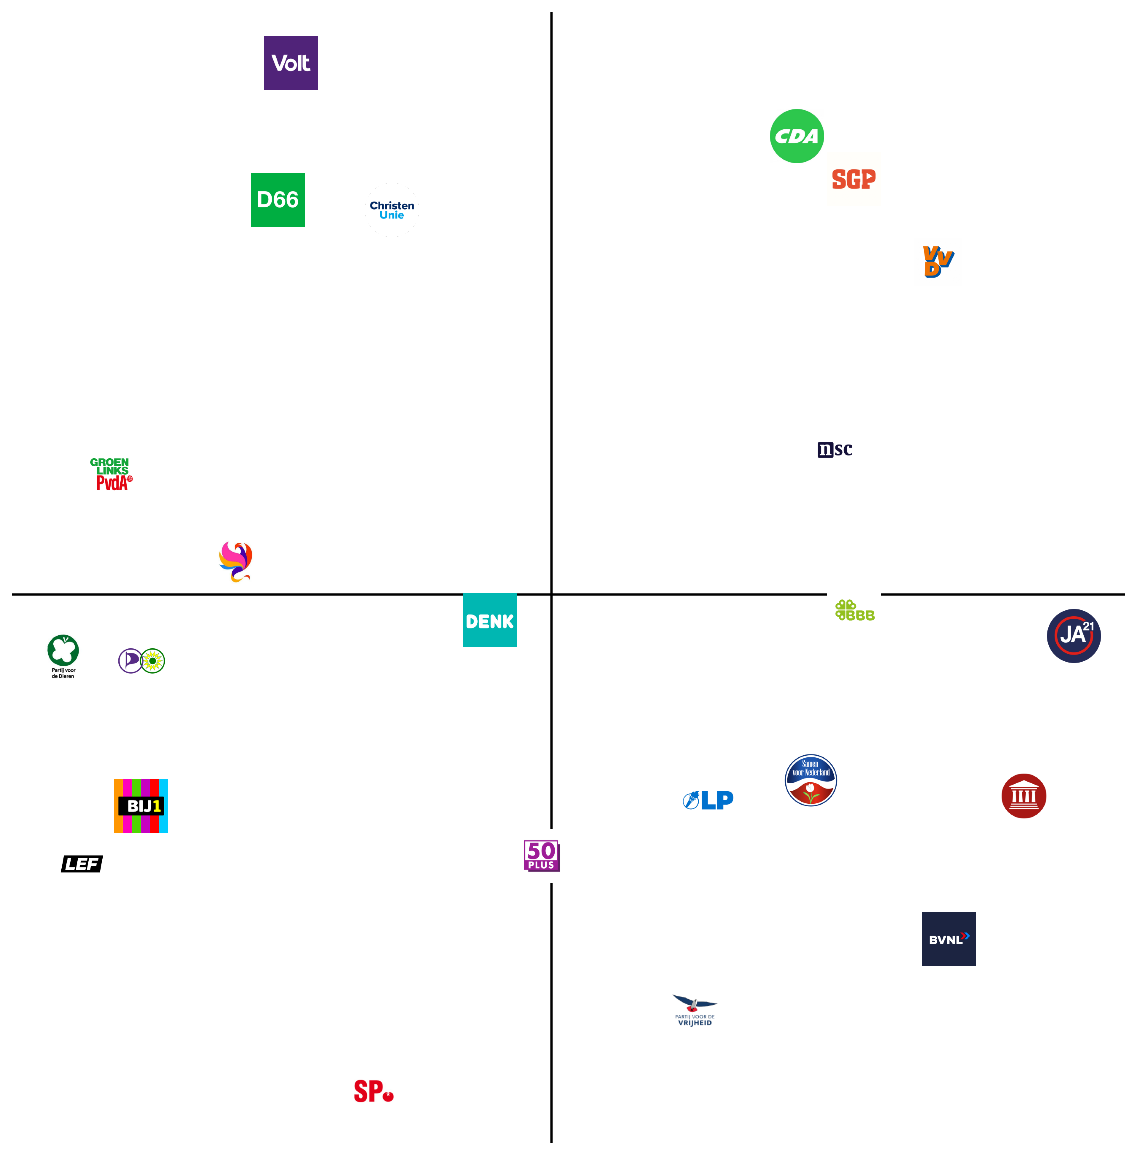

In [47]:
fig, ax = plt.subplots(figsize=(10,10), dpi=120, facecolor='white')

# Layout
fig.tight_layout()
ax.set_axis_off()

ax.axhline(0, color='k')
ax.axvline(0, color='k')

for x, y, party in zip(pc_1, pc_2, partijen_totaal):
    plot_logo(x, y, f"logos/{party}.png", ax=ax, zoom=.25)

fig.savefig('figures/political_compass.png', dpi=300, bbox_inches='tight')

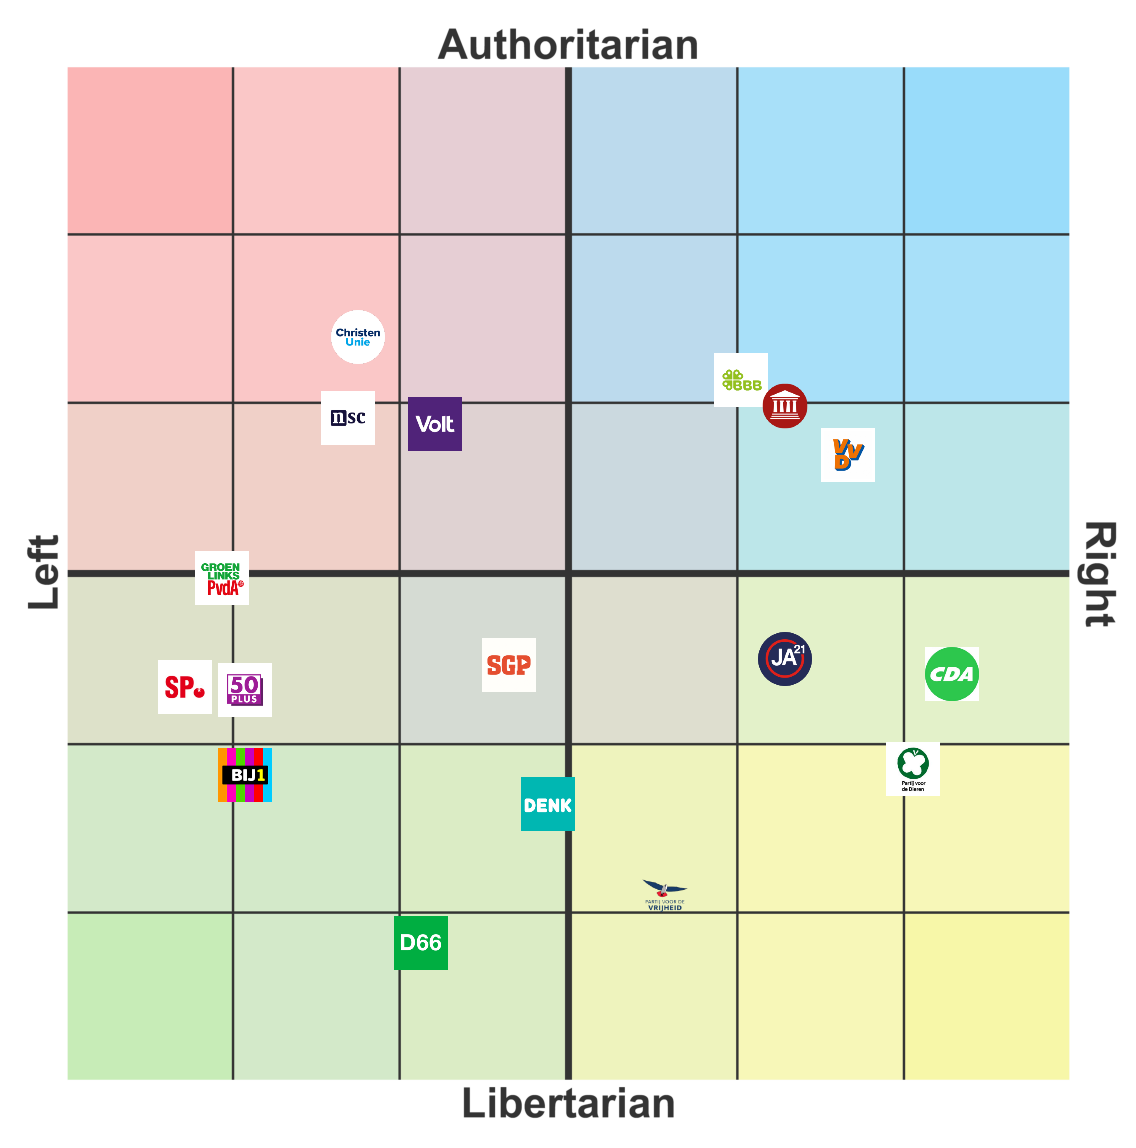

In [83]:
fig, ax = plt.subplots(figsize=(10,10), dpi=120, facecolor='white')

# Layout
fig.tight_layout()
ax.set_axis_off()

# Plot political compass template
img = plt.imread('logos/political_compass_template.png')

x_min, x_max = pc_1.min(), pc_1.max()
y_min, y_max = pc_2.min(), pc_2.max()
ax.imshow(img, extent=[x_min-2, x_max+2, y_max+3, y_min-3], alpha=.8)

for x, y, party in zip(pc_1, pc_2, partijen_zetel):
    plot_logo(x, 1-y, f"logos/{party}.png", ax=ax, zoom=.25)

fig.savefig('figures/political_compass.png', dpi=300, bbox_inches='tight')

## Correlation

In [65]:
order = [x for _, x in sorted(zip(pc_1, partijen_totaal))]

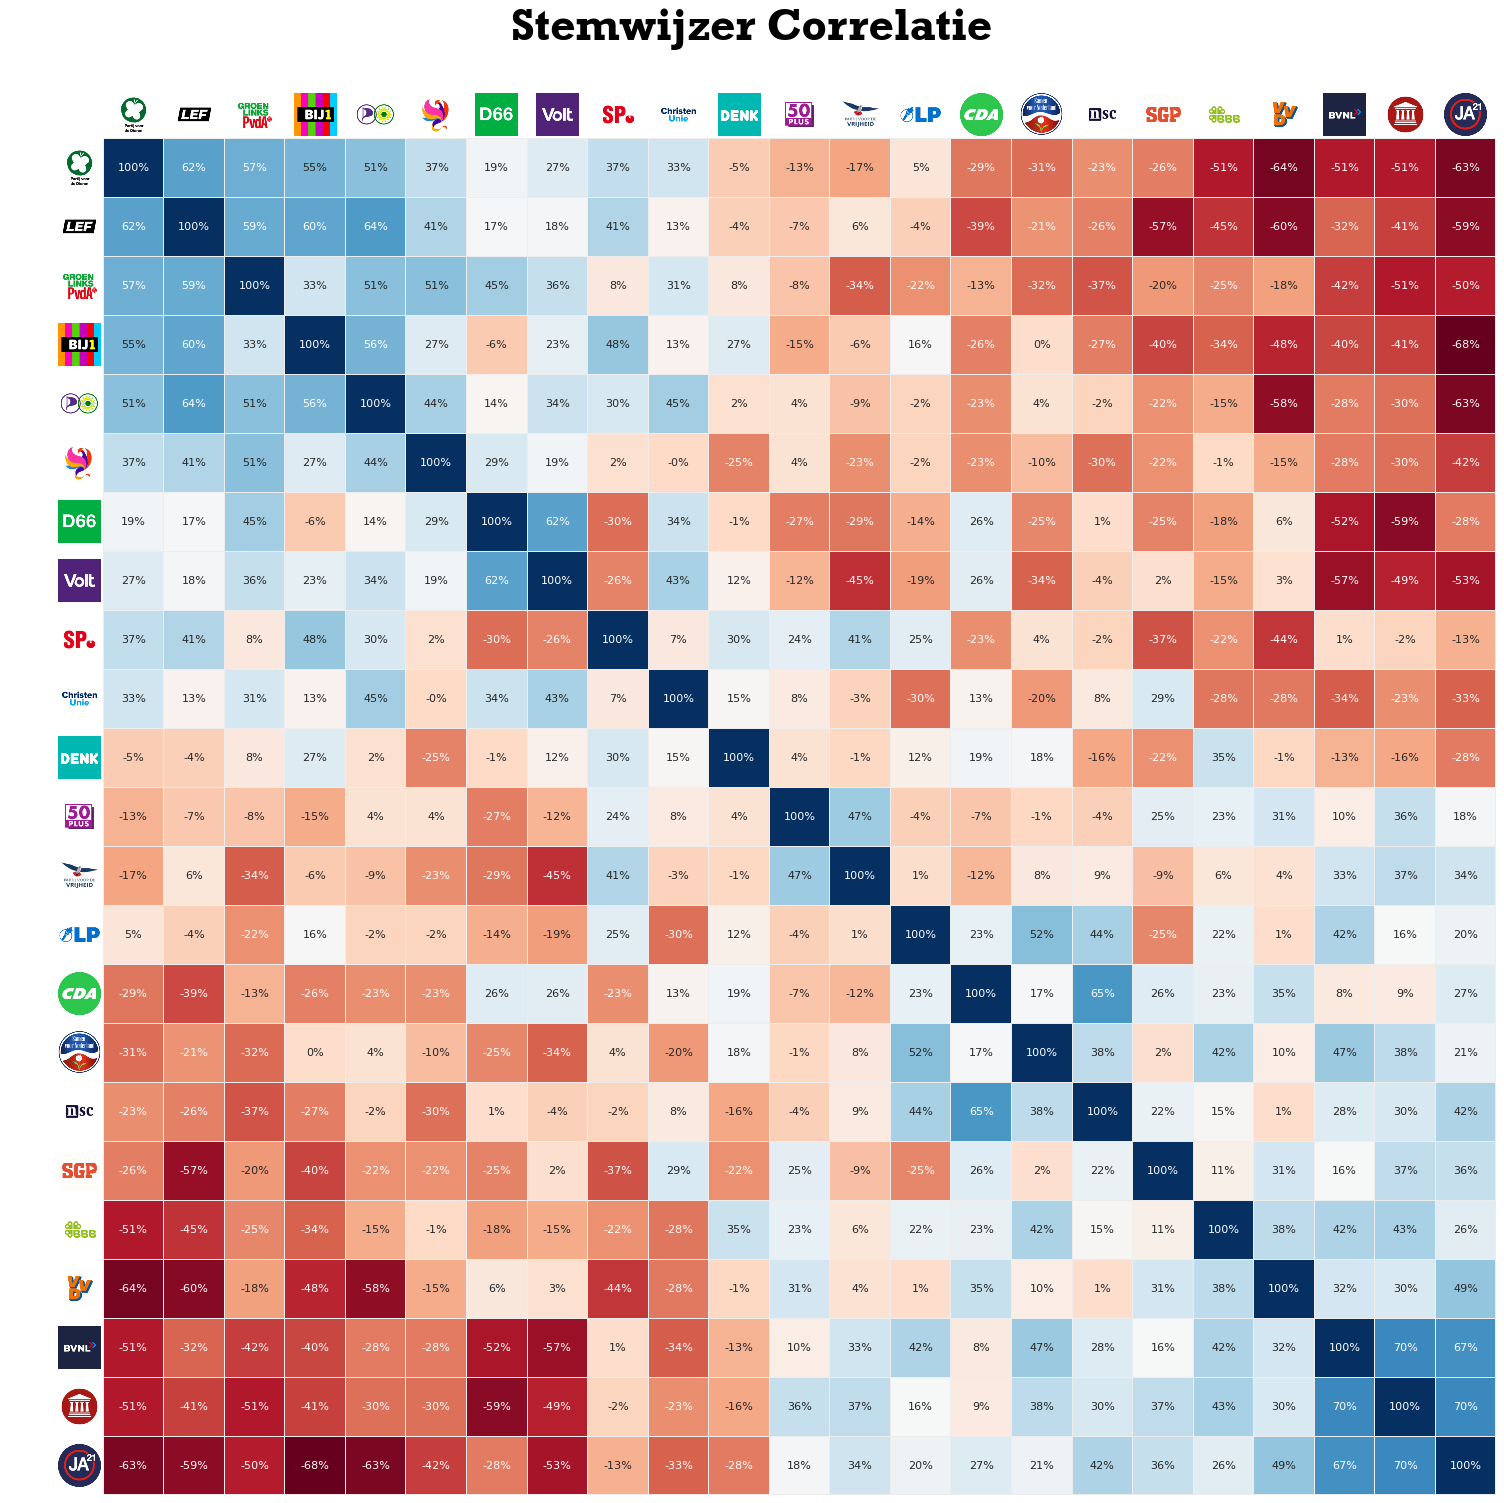

In [72]:
fig, ax = plt.subplots(figsize=(24,24), dpi=80, facecolor='white')

correlation_totaal = stemwijzer_totaal.T[order].corr()

# Custom annotation
annot = correlation_totaal.apply(lambda s: s.apply(lambda x: '{:.0%}'.format(x)))

# Plot heatmap
g = sns.heatmap(correlation_totaal, ax=ax, cmap='RdBu', cbar=False,
                linecolor='#ededed', linewidths=.005,
                annot=annot, fmt='', annot_kws={'fontsize': 10})

# Plot logos
for pos, party in enumerate(correlation_totaal.columns):
    plot_logo(pos+0.5, -.4, f"logos/{party}.png", ax=ax, zoom=.3)
    plot_logo(-0.4, pos+0.5, f"logos/{party}.png", ax=ax, zoom=.3)

# Set titles
g.set_title('Stemwijzer Correlatie', fontsize=40, fontweight='bold', fontname='Rockwell')
g.set_xticklabels([])
g.set_yticklabels([])

# Move axis to top and remove ticks
g.xaxis.set_ticks_position('top')
g.tick_params(axis='both', which='both', length=0)

fig.savefig('figures/political_correlation.png', dpi=300, bbox_inches='tight')

In [76]:
order_zetel = [i for i in order if i in partijen_zetel]

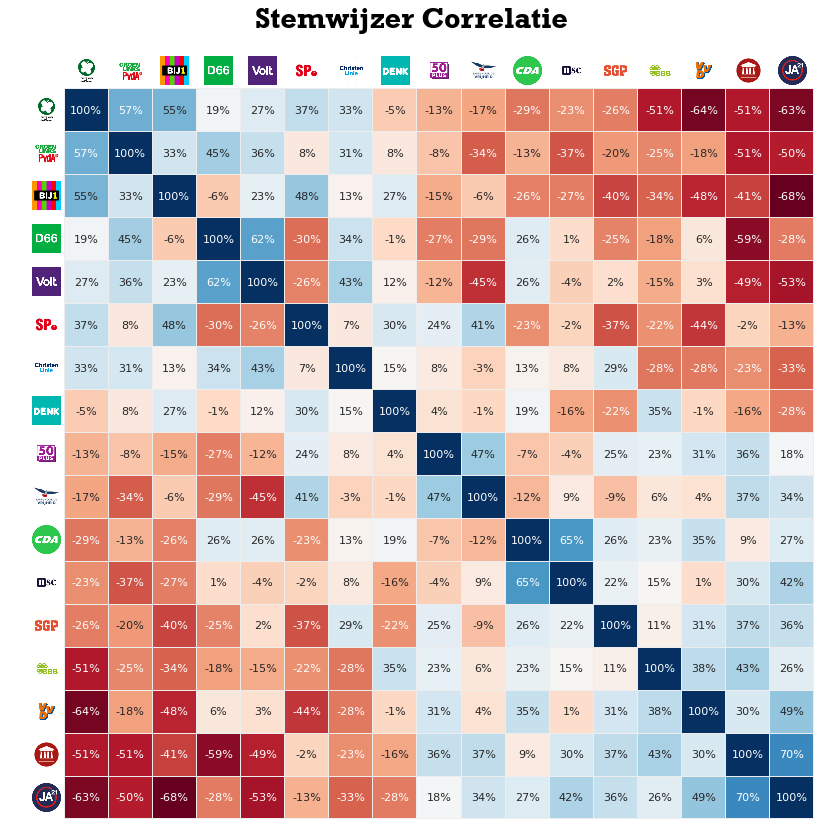

In [77]:
fig, ax = plt.subplots(figsize=(13,13), dpi=80, facecolor='white')

# Correlation between parties
correlation = stemwijzer_zetel.T[order_zetel].corr()

# Custom annotation
annot = correlation.apply(lambda s: s.apply(lambda x: '{:.0%}'.format(x)))

# Plot heatmap
g = sns.heatmap(correlation, ax=ax, cmap='RdBu', cbar=False,
                linecolor='#ededed', linewidths=.005,
                annot=annot, fmt='', annot_kws={'fontsize': 10})

# Plot logos
for pos, party in enumerate(correlation.columns):
    plot_logo(pos+0.5, -.4, f"logos/{party}.png", ax=ax, zoom=.2)
    plot_logo(-0.4, pos+0.5, f"logos/{party}.png", ax=ax, zoom=.2)

# Set titles
g.set_title('Stemwijzer Correlatie', fontsize=26, fontweight='bold', fontname='Rockwell')
g.set_xticklabels([])
g.set_yticklabels([])

# Move axis to top and remove ticks
g.xaxis.set_ticks_position('top')
g.tick_params(axis='both', which='both', length=0)

fig.savefig('figures/political_correlation_current.png', dpi=300, bbox_inches='tight')

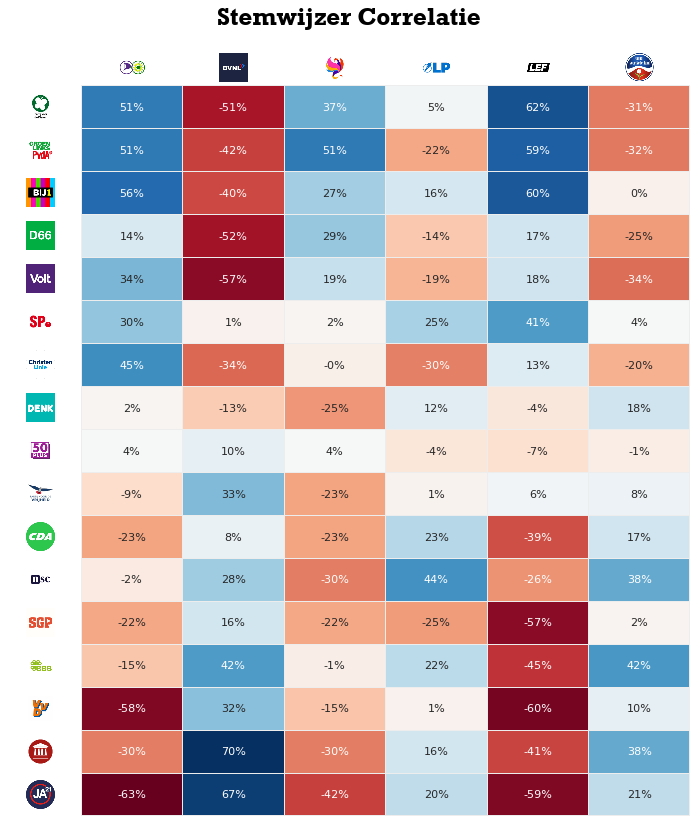

In [81]:
fig, ax = plt.subplots(figsize=(11,13), dpi=80, facecolor='white')

correlation_nieuw = (pd.concat([stemwijzer_zetel.T[order_zetel], stemwijzer_nieuw.T], axis=1,
                                keys=['stemwijzer_zetel', 'stemwijzer_nieuw'])
                     .corr().loc['stemwijzer_zetel', 'stemwijzer_nieuw'])

# Custom annotation
annot = correlation_nieuw.apply(lambda s: s.apply(lambda x: '{:.0%}'.format(x)))

# Plot heatmap
g = sns.heatmap(correlation_nieuw, ax=ax, cmap='RdBu', cbar=False,
                linecolor='#ededed', linewidths=.005,
                annot=annot, fmt='', annot_kws={'fontsize': 10})

# Plot logos
for pos, party in enumerate(correlation_nieuw.columns):
    plot_logo(pos+0.5, -.4, f"logos/{party}.png", ax=ax, zoom=.2)
for pos, party in enumerate(correlation_nieuw.index):
    plot_logo(-0.4, pos+0.5, f"logos/{party}.png", ax=ax, zoom=.2)

# Set titles
g.set_title('Stemwijzer Correlatie', fontsize=22, fontweight='bold', fontname='Rockwell')
g.set_xticklabels([])
g.set_yticklabels([])

# Move axis to top and remove ticks
g.xaxis.set_ticks_position('top')
g.tick_params(axis='both', which='both', length=0)

fig.savefig('figures/political_correlation_new.png', dpi=300, bbox_inches='tight')

## Zetels

In [71]:
zetel_verdeling = {'vvd': 27, 'nsc': 27, 'glpvda': 23, 'pvv': 18, 'bbb': 12,
                   'd66': 7, 'pvdd': 7, 'sp': 5, 'volt': 4, 'cu': 4, 'cda': 4, 'fvd': 4,
                   'sgp': 3, 'denk': 3,  'ja21': 2}
sum(zetel_verdeling.values())

150

In [72]:
def get_parties(row):
    '''Retuns the parties that agree with the statement'''
    parties = []
    for party in zetel_verdeling:
        if row[party] > 0:
            parties.append(party)
    return ', '.join(parties) 

In [78]:
stelling_zetels = stemwijzer_totaal.transpose()
for partij, zetels in zetel_verdeling.items():
    stelling_zetels[partij] = np.where(stelling_zetels[partij] == 1, zetels, 0)

stelling_zetels['voorstanders'] = stelling_zetels.apply(get_parties, axis=1).str.upper()
stelling_zetels['zetels'] = stelling_zetels.sum(axis=1)

stelling_zetels = stelling_zetels[['voorstanders', 'zetels']]
stelling_zetels.sort_values('zetels', ascending=False, inplace=True)

stelling_zetels.style.apply(lambda x: ['background: green' if z > 75 else 'background: red' for z in x], subset='zetels', axis = 1)

,voorstanders,zetels
cultuuronderwijs,"VVD, NSC, GLPVDA, BBB, D66, VOLT, CU, CDA, FVD, SGP, JA21",117
kerncentrales,"VVD, NSC, PVV, BBB, D66, VOLT, CU, CDA, FVD, SGP, DENK, JA21",115
referendum,"NSC, GLPVDA, PVV, BBB, D66, PVDD, SP, FVD, JA21",111
lagere-prijs-benzine,"VVD, NSC, PVV, BBB, SP, CDA, FVD, SGP, DENK, JA21",107
ontwikkelingshulp-en-asielszoekers,"VVD, NSC, PVV, BBB, D66, CDA, FVD, JA21",103
kinderopvang-zonder-winstoogmerk,"NSC, GLPVDA, PVV, D66, PVDD, SP, VOLT, CU, CDA, DENK",102
risicoprofilering-op-basis-van-nationaliteit,"NSC, GLPVDA, BBB, D66, PVDD, SP, VOLT, CDA, DENK",98
kopen-huurwoning,"VVD, GLPVDA, PVV, BBB, D66, CDA, FVD, DENK, JA21",98
gezinshereniging,"VVD, NSC, PVV, BBB, CDA, FVD, SGP, JA21",95
2%-voor-defensie,"NSC, GLPVDA, D66, PVDD, SP, VOLT, CU, CDA, DENK",88
